# Neural Networks with pure Python

Code taken and improved from the lecture series "Machine Learning for Physicists" by Dr. Florian Marquardt.

## Lecture 1

See https://rodolfoferro.xyz/ml4physicists and the current course website linked there!

This notebook shows how to:
- Implement the forward-pass (evaluation) of a deep, fully connected neural network in a few lines of Python
- Do that efficiently using batches
- Illustrate the results for randomly initialized neural networks

## Import packages to be used

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
plt.style.use('ggplot')

## A very simple neural network (no hidden layers!)


A network with `n_0` input neurons and `n_1` output neurons (with no hidden layers!).

$$y^{\rm out}_j = f(\sum_k w_{jk} y^{\rm in}_k + b_k)$$

where $w$ is the weight matrix, $b$ is the bias vector, and $f$ would be the activation function (e.g. the Sigmoid function in our case), which is applied independently for each $j$.

## Initialization

We initialize the number of neurons to be used, 3 for the input (as we will feed the neural network with 3 input elements) and output of 2 (as the output will be 2 elements).

In [2]:
n_0 = 3 # Input size of layer
n_1 = 2 # Output size of layer

We can now proceed to initialize the random weights as a matrix with size `(n_1, n_0)`, since we want `n_1` elements as the output and `n_0` elements as the input.

Similarly, as the bias vector should be the same size as the output size, the random random ector for `b` has size `n_1`.

In [3]:
# Initialize random weights - Array dimensions n_1 x n_0
w = np.random.uniform(low=-1, high=1, size=(n_1, n_0))

# Initialize random biases – Array dimension n_1
b = np.random.uniform(low=-1, high=1, size=n_1)

We create an input vector with (why not) specific random values set by hand.

In [4]:
# Define input values
y_in = np.array([0.2, 0.4, -0.1])

## Network evaluation (forward-pass)

We apply the dot product and add the bias, then apply the Sigmoid function.

In [5]:
# Evaluate network by hand, in two steps
z = np.dot(w, y_in) + b

# The 'sigmoid' function (applied elementwise)
y_out = 1. / (1 + np.exp(-z))

## Let's print the elements in this network!

In [6]:
print("Network input vector y_in:")
print(y_in)
print()

print("Weights matrix w:")
print(w)
print()

print("Bias vector b:")
print(b)
print()

print("Linear superposition z:")
print(z)
print()

print("Network output vector y_out:")
print(y_out)
print()

Network input vector y_in:
[ 0.2  0.4 -0.1]

Weights matrix w:
[[ 0.76440672 -0.64662238  0.06195522]
 [-0.26461087  0.93788591  0.24402089]]

Bias vector b:
[ 0.3526727  -0.55569817]

Linear superposition z:
[ 0.24070958 -0.25786807]

Network output vector y_out:
[0.55988851 0.43588786]



## Visualize network output

Still stay with the simple network, but define a function that evaluates the network, and visualize the  output for various inputs.

In [7]:
def apply_net(y_in, w, b):
    """A general function that computes the dot
    product and applies the Sigmoid function."""
    
    z = np.dot(y_in, w) + b
    s = 1. / (1. + np.exp(-z))
    
    return s

Since we want to be able to plot the resultes for a 2D space, we will redefine the values of `n_0`, `n_1`, `w` and `b`.

In [8]:
n_0 = 2 # Input size of layer
n_1 = 1 # Output size of layer

# Initialize random weights - Array dimensions n_0 x n_1
w = np.random.uniform(low=-10, high=10, size=(n_0, n_1))

# Initialize random biases – Array dimension n_1
b = np.random.uniform(low=-1, high=1, size=n_1)

And we now proceed to evaluate the net for two random input values.

In [9]:
# a simple test
apply_net([0.8, 0.3], w, b)

array([4.44295487e-05])

We are now able to build the visualizaton plot. To do so, we first create a grid with $(x, y)$ values that will be used as the input values in the vector `y_in`.

In [10]:
# Generate a 'mesh grid', i.e. (x, y) values in an image
grid_size = 50
x = np.linspace(-0.5, 0.5, grid_size)
y = np.linspace(-0.5, 0.5, grid_size)
xx, yy = np.meshgrid(x, y)

Let's get all the values from the grid in $(x, y)$ format as the input vector of vectors so we can apply the newtork.

In [11]:
x_flat = xx.flatten()
y_flat = yy.flatten()

y_in = zip(x_flat, y_flat)
y_in = np.array(list(y_in))

In [12]:
y_in.shape

(2500, 2)

We can now apply directly the network to the input vector of vectors `y_in` (in a whole batch!).

This will be the way to generalize the application of the operations over batches.

In [13]:
# Apply net to all these samples simultaneously!
y_out = apply_net(y_in, w, b)

In [14]:
y_out

array([[9.99899523e-01],
       [9.99878861e-01],
       [9.99853951e-01],
       ...,
       [1.62198462e-04],
       [1.34534430e-04],
       [1.11588157e-04]])

We reshape the values from this array into the grid matrix and proceed to plot the output of the network.

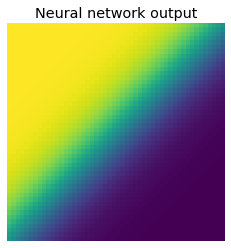

In [15]:
# Reshape the output vector
y_out_2d = np.reshape(y_out, (grid_size, grid_size))

# Plot results of the network
plt.imshow(y_out_2d)
plt.title("Neural network output")
plt.axis('off')
plt.show()

## Now let's try with 1 hidden layer

We initialize values.

In [16]:
n_0 = 2  # Input layer size
n_1 = 30 # Hidden layer size
n_2 = 1  # Output layer size

# Weights and biases from input layer to hidden layer
w_1 = np.random.uniform(low=-10, high=10, size=(n_0, n_1))
b_1 = np.random.uniform(low=-1, high=1, size=n_1)

# Weights and biases from hidden layer to output layer
w_2 = np.random.uniform(low=-10, high=10, size=(n_1, n_2))
b_2 = np.random.uniform(low=-1, high=1, size=n_2)

We update our `apply_net`function for the hidden layer.

In [17]:
def apply_layer(y_in, w, b):
    """A general function that computes the dot
    product and applies the Sigmoid function."""
    
    z = np.dot(y_in, w) + b
    s = 1. / (1. + np.exp(-z))
    
    return s


def apply_net(y_in, w, b):
    """A general function that computes the result
    of a neural networf for a hidden layer."""
    
    y_1 = apply_layer(y_in, w[0], b[0])
    y_2 = apply_layer(y_1, w[1], b[1])
    
    return y_2

We generate again our meshgrid and apply the net...

In [18]:
# Generate a 'mesh grid', i.e. (x, y) values in an image
grid_size = 50
x = np.linspace(-0.5, 0.5, grid_size)
y = np.linspace(-0.5, 0.5, grid_size)
xx, yy = np.meshgrid(x, y)

x_flat = xx.flatten()
y_flat = yy.flatten()

y_in = zip(x_flat, y_flat)
y_in = np.array(list(y_in))

# We now apply he network
y_out = apply_net(y_in, w=[w_1, w_2], b=[b_1, b_2])

...and plot the output.

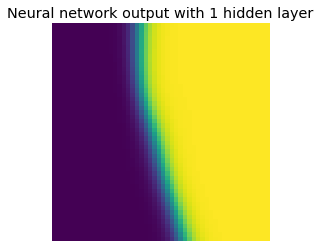

In [19]:
# Reshape the output vector
y_out_2d = np.reshape(y_out, (grid_size, grid_size))

# Plot results of the network
plt.imshow(y_out_2d)
plt.title("Neural network output with 1 hidden layer")
plt.axis('off')
plt.show()

## Now let's try with multiple hidden layers

We initialize values.

In [20]:
n_in = 2         # Input layer size
n_layers = 20    # Number of hidden layers (without input and output layers)
layer_size = 100 # Hidden layers size
n_out = 1        # Output layer size

# Weights and biases for input layer
w_in = np.random.uniform(low=-1, high=1, size=(n_in, layer_size))
b_in = np.random.uniform(low=-1, high=1, size=layer_size)

# Weights and biases for all hidden layers
w_hidden = np.random.uniform(low=-3, high=3, size=(n_layers, layer_size, layer_size))
b_hidden = np.random.uniform(low=-1, high=1, size=(n_layers, layer_size))

# Weights and biases for output layer
w_out = np.random.uniform(low=-1, high=1, size=(layer_size, n_out))
b_out = np.random.uniform(low=-1, high=1, size=n_out)

We update our `apply_net` function for the hidden layer.

In [21]:
def apply_layer(y_in, w, b):
    """A general function that computes the dot
    product and applies the Sigmoid function."""
    
    z = np.dot(y_in, w) + b
    s = 1. / (1. + np.exp(-z))
    
    return s


def apply_net(y_in, w, b):
    """A general function that computes the result
    of a neural networf for a hidden layer."""
    
    y = apply_layer(y_in, w[0], b[0])
    for i in range(w[1].shape[0]): # The number of hidden layers
        y = apply_layer(y, w[1][i], b[1][i])
    output = apply_layer(y, w[2], b[2])
    
    return output

We generate again our meshgrid and apply the net...

In [22]:
# Generate a 'mesh grid', i.e. (x, y) values in an image
grid_size = 50
x = np.linspace(-0.5, 0.5, grid_size)
y = np.linspace(-0.5, 0.5, grid_size)
xx, yy = np.meshgrid(x, y)

x_flat = xx.flatten()
y_flat = yy.flatten()

y_in = zip(x_flat, y_flat)
y_in = np.array(list(y_in))

# We now apply he network
y_out = apply_net(y_in, 
                  w=[w_in, w_hidden, w_out],
                  b=[b_in, b_hidden, b_out])

...and plot the output.

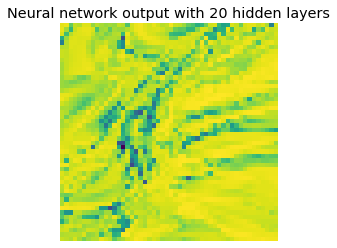

In [23]:
# Reshape the output vector
y_out_2d = np.reshape(y_out, (grid_size, grid_size))

# Plot results of the network
plt.imshow(y_out_2d)
plt.title(f"Neural network output with {n_layers} hidden layers")
plt.axis('off')
plt.show()

## And in full resolution...

In [24]:
# Generate a 'mesh grid', i.e. (x, y) values in an image
grid_size = 500
x = np.linspace(-0.5, 0.5, grid_size)
y = np.linspace(-0.5, 0.5, grid_size)
xx, yy = np.meshgrid(x, y)

x_flat = xx.flatten()
y_flat = yy.flatten()

y_in = zip(x_flat, y_flat)
y_in = np.array(list(y_in))

# We now apply he network
y_out = apply_net(y_in, 
                  w=[w_in, w_hidden, w_out],
                  b=[b_in, b_hidden, b_out])

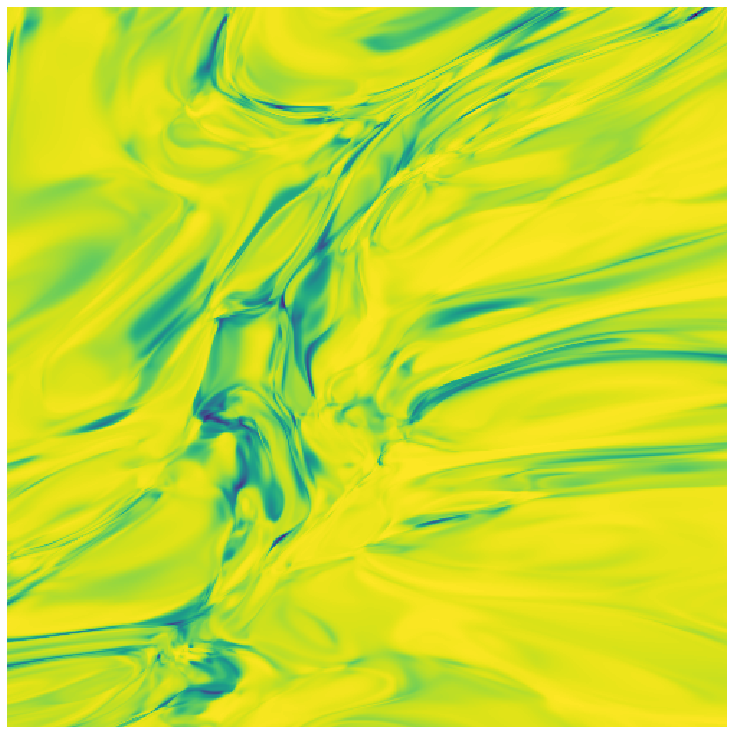

In [25]:
# Reshape the output vector
y_out_2d = np.reshape(y_out, (grid_size, grid_size))

# Plot results of the network
plt.figure(figsize=(10, 10))
plt.axes([0, 0, 1, 1])
plt.imshow(y_out_2d,
           extent=[-0.5, 0.5, -0.5, 0.5],
           interpolation='nearest')
plt.axis('off')
plt.savefig('output.png')
plt.show()